<a href="https://colab.research.google.com/github/RanxduG/Sri-Lanka-Formaldehyde-Level-Analysis/blob/main/Colombo_HCHO_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IMPORTING GENERAL LIBRARIES**

In [38]:
import pandas as pd
import seaborn as sns
from google.colab import drive

#**LOADING DATASET**


In [39]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
Colombo_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Engineering Coursework/Full/colombo_joined_data.csv')


#**PREPARING DATASET FOR ANAYSIS**


In [41]:
# Assuming 'date' column is in string format
Colombo_data['date'] = pd.to_datetime(Colombo_data['date'])


In [42]:
Colombo_data.set_index('date', inplace=True)

In [43]:
Colombo_data.rename(columns={'HCHO reading': 'HCHO_reading'}, inplace=True)

#**DESCRIBING DATA**


In [44]:
Colombo_data.head()

,T2M,TS,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WD10M,WS50M,WD50M,HCHO_reading,Location,Current Date,Next Date,month
date,,,,,,,,,,,,,,,
2019-01-01,24.80,25.29,15.62,80.00,0.12,100.03,6.29,35.50,8.16,37.00,0.000197,Colombo Proper,2019-01-01,2019-01-02,2019-01
2019-01-02,24.39,25.01,15.14,79.50,0.02,100.02,5.64,33.44,7.34,35.31,0.000263,Colombo Proper,2019-01-02,2019-01-03,2019-01
2019-01-03,24.17,24.73,14.77,78.50,0.01,100.06,6.15,30.62,7.91,32.06,0.000099,Colombo Proper,2019-01-03,2019-01-04,2019-01
2019-01-04,24.04,24.57,14.47,77.62,0.00,100.01,5.64,34.25,7.43,36.19,0.000210,Colombo Proper,2019-01-04,2019-01-05,2019-01
2019-01-05,24.87,25.33,16.05,81.50,0.03,99.88,5.47,71.81,7.20,44.19,0.000179,Colombo Proper,2019-01-05,2019-01-06,2019-01


In [45]:
Colombo_data.describe()

,T2M,TS,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WD10M,WS50M,WD50M,HCHO_reading
count,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000
mean,26.586698,26.974107,18.360975,83.770268,6.886325,99.564901,4.230159,189.819874,5.462788,188.375608,0.000156
std,0.894135,1.019659,1.269119,4.813949,9.055817,0.148006,1.606205,81.079126,2.120336,81.767163,0.000085
min,23.290000,23.760000,13.610000,59.750000,0.000000,99.090000,0.880000,12.810000,1.230000,13.690000,0.000000
25%,26.020000,26.340000,17.760000,81.205000,1.002500,99.460000,2.782500,138.470000,3.530000,133.922500,0.000098
50%,26.530000,26.820000,18.550000,84.880000,3.690000,99.560000,4.380000,225.720000,5.700000,225.410000,0.000144
75%,27.190000,27.527500,19.230000,87.310000,9.137500,99.660000,5.480000,247.380000,7.150000,247.310000,0.000207
max,29.340000,30.760000,21.420000,92.500000,83.860000,100.080000,9.330000,336.120000,11.840000,336.380000,0.000478


In [46]:
features_to_remove = ['Location',	'Current Date', 	'Next Date', 	'month']
Colombo_data = Colombo_data.drop(features_to_remove, axis=1)

#**CHECKING EACH COLUMN OF DATA**


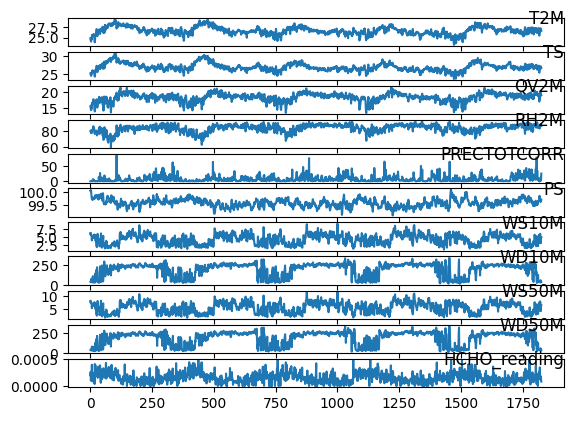

In [47]:
from matplotlib import pyplot as plt

values = Colombo_data.values
groups = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
i = 1
# plot each column
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(Colombo_data.columns[group], y=0.5, loc='right')
    i += 1


plt.show()

#**HCHO READING VS DATE**


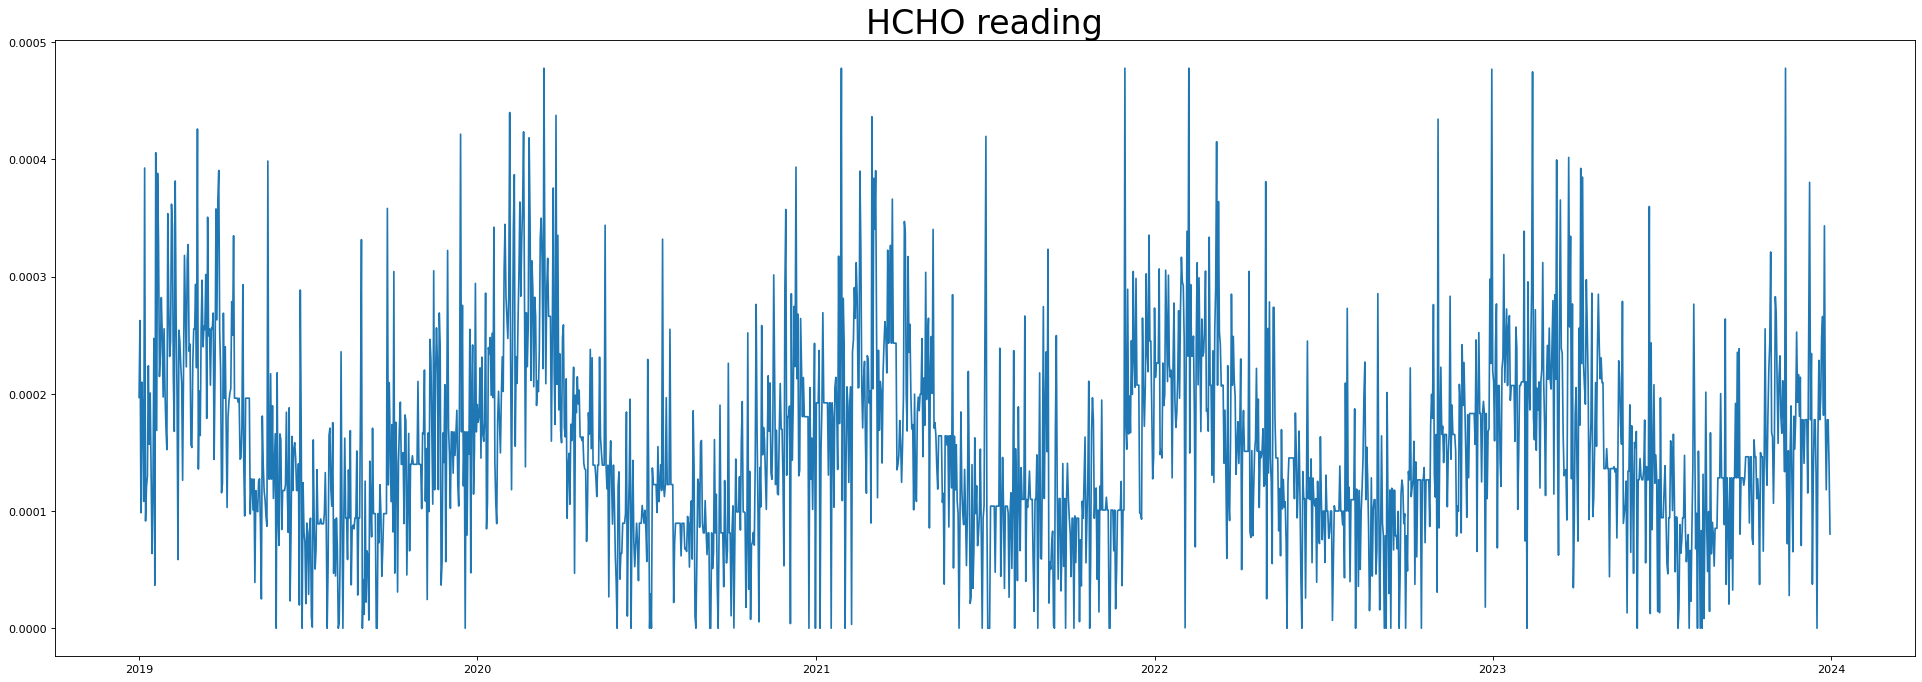

In [48]:
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('HCHO reading', fontsize=30)

plt.plot(Colombo_data.HCHO_reading)

#**USING SEASONAL DECOMPOSE TO IDENTIFY TREND AND SEASONALITY**


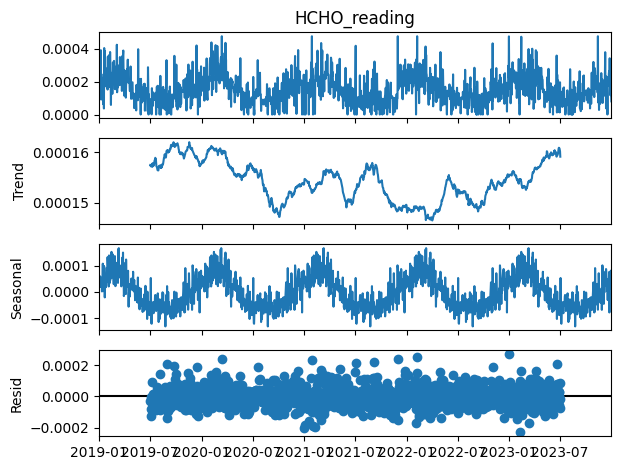

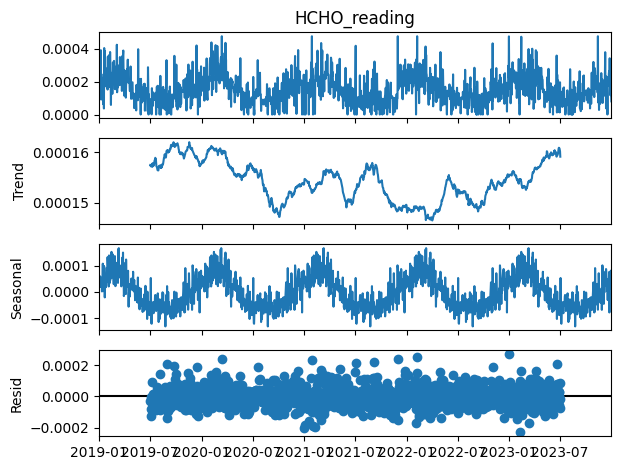

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose

series = Colombo_data.HCHO_reading
result = seasonal_decompose(series, model='additive', period=365)
result.plot()

#**PLOTING HCHO ROLLING MEAN AND ROLLING STANDARD DEVIATION (WINDOW=30)**


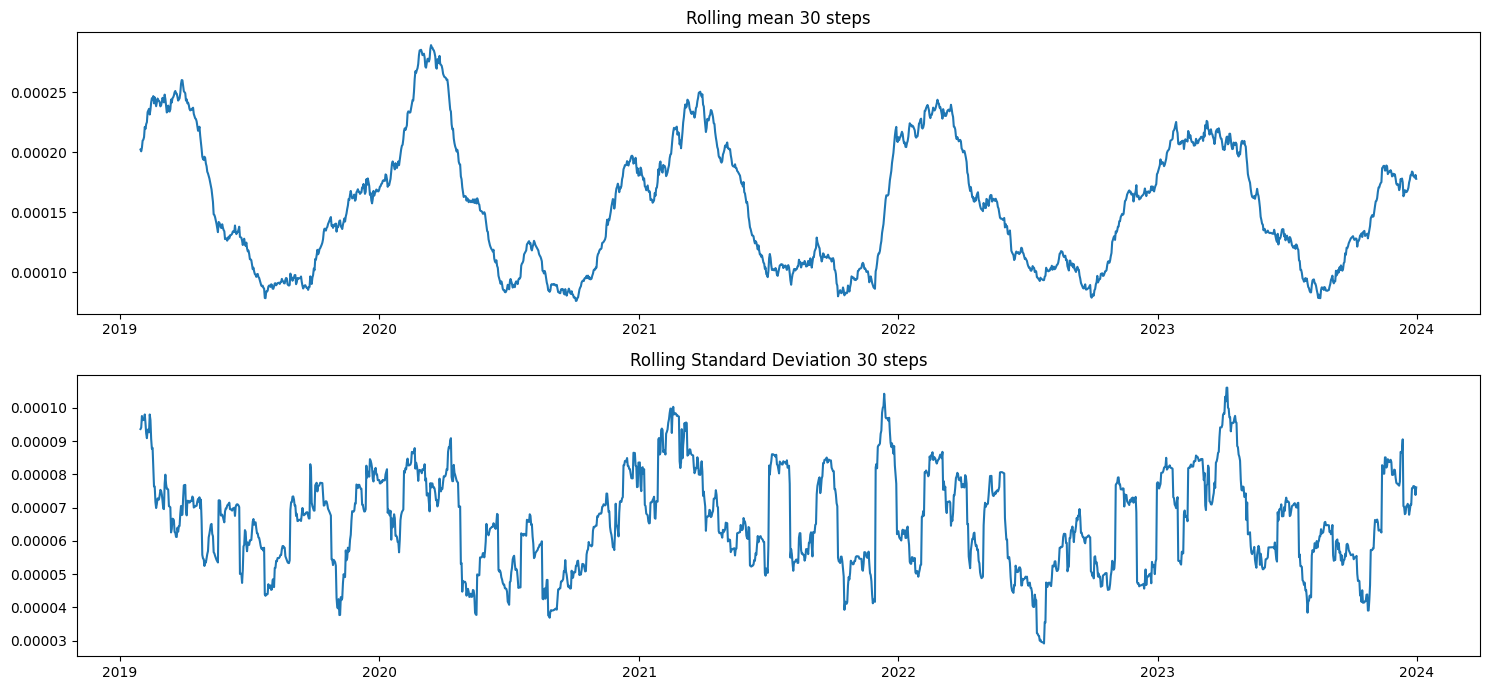

In [50]:
import numpy as np

fig = plt.figure(figsize=(15, 7))
layout = (2, 2)
mv_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
std_ax = plt.subplot2grid(layout, (1, 0), colspan=2)

mm = Colombo_data.HCHO_reading.rolling(30).mean()
mv_ax.plot(mm)
mv_ax.set_title("Rolling mean 30 steps")

std = Colombo_data.HCHO_reading.rolling(30).std()
std_ax.plot(std)
std_ax.set_title("Rolling Standard Deviation 30 steps")

plt.tight_layout()

#**HCHO WEEKLY MEAN VS DATE**


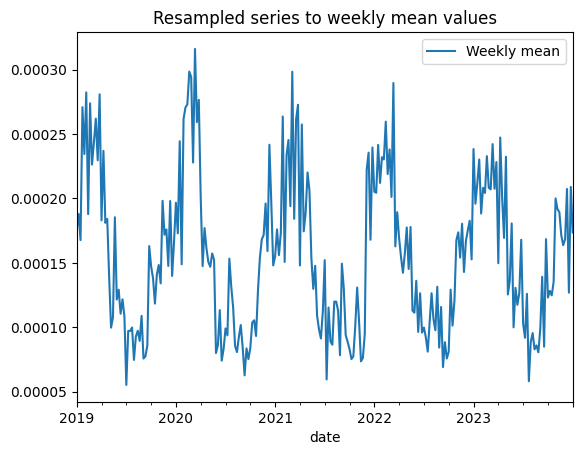

In [51]:
# Looking for weekly seasonality
resample = Colombo_data.resample('W')
weekly_mean = resample.mean()
weekly_mean.HCHO_reading.plot(label='Weekly mean')
plt.title("Resampled series to weekly mean values")
plt.legend()

#**POLYNOMIAL FIT**


/usr/local/lib/python3.10/dist-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
<ipython-input-52-a80c033f8100>:7: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(X, y, degree)


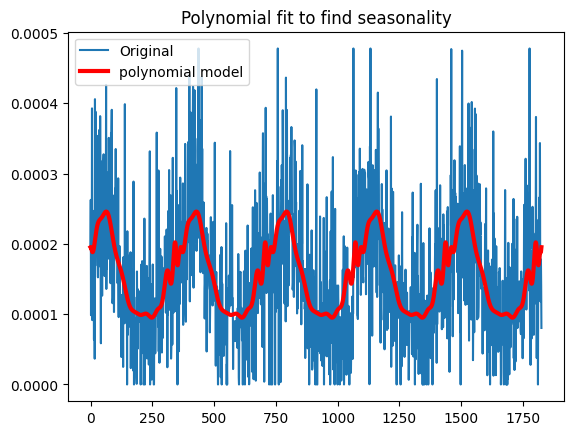

In [52]:
# Fix xticks to show dates
# fit polynomial: x^2*b1 + x*b2 + ... + bn
series = Colombo_data.HCHO_reading.values
X = [i % 365 for i in range(0, len(series))]
y = series
degree = 100
coef = np.polyfit(X, y, degree)
# create curve
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curve.append(value)
# plot curve over original data
plt.plot(series, label='Original')
plt.plot(curve, color='red', linewidth=3, label='polynomial model')
plt.legend()
plt.title("Polynomial fit to find seasonality")
plt.show()

#**FINDING NOISE**


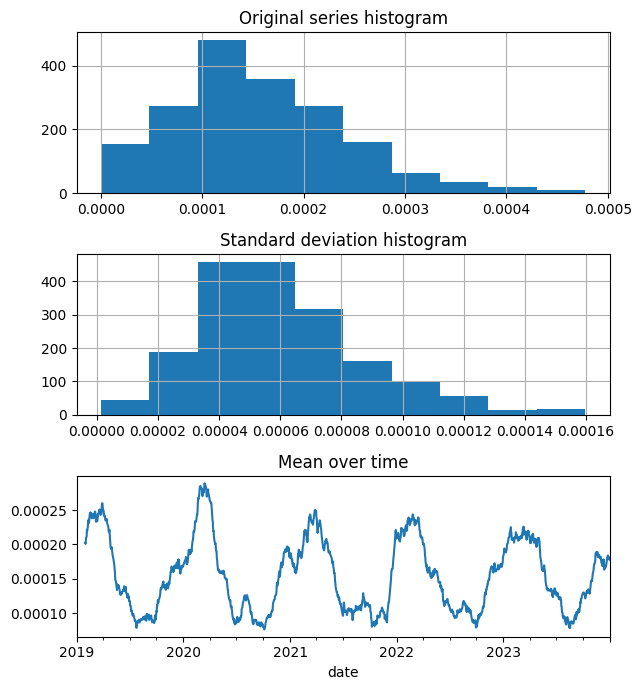

In [53]:
fig = plt.figure(figsize=(12, 7))
layout = (3, 2)
hist_ax = plt.subplot2grid(layout, (0, 0))
hist_std_ax = plt.subplot2grid(layout, (1, 0))
mean_ax = plt.subplot2grid(layout, (2, 0))

Colombo_data.HCHO_reading.hist(ax=hist_ax)
hist_ax.set_title("Original series histogram")

mm = Colombo_data.HCHO_reading.rolling(7).std()
mm.hist(ax=hist_std_ax)
hist_std_ax.set_title("Standard deviation histogram")

mm = Colombo_data.HCHO_reading.rolling(30).mean()
mm.plot(ax=mean_ax)
mean_ax.set_title("Mean over time")
plt.tight_layout()

#**PAC & AC PLOTS**


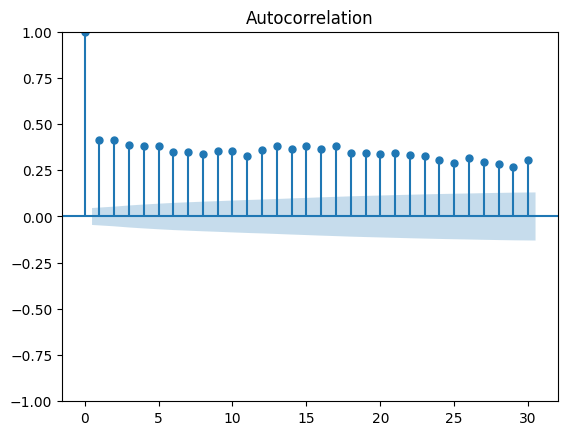

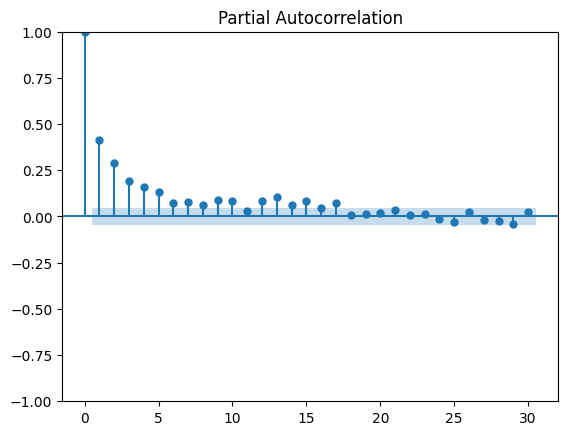

In [54]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(series, lags=30)
plot_pacf(series, lags=30)
plt.show()

#**ADF TEST**


In [55]:
from statsmodels.tsa.stattools import adfuller

X = Colombo_data.HCHO_reading.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.312507
p-value: 0.014329
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
